<a href="https://colab.research.google.com/github/Professor-Shin/CS-Class-Project/blob/main/Image_Processing/Impro_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**
By: Siwakorn Saiphaisri 6634468023

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

## Quiz 1
Write a program to zoom the given images to be three times as big and shrink the enlarged images to be one-third of their size using replication and bilinear interpolation.

In [ ]:
class quiz1:
  def __init__(self, img):
    self.img = img
    self.gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # default of cv is BGR color

  def zoom_replication(self):
    self.zoomed_replication = cv2.resize(self.gray_img, None, fx=3, fy=3, interpolation=cv2.INTER_NEAREST)

  def shrink_replication(self):
    self.shrunk_replication = cv2.resize(self.zoomed_replication, None, fx=1/3, fy=1/3, interpolation=cv2.INTER_NEAREST)

  def zoom_bilinear(self):
    self.zoomed_bilinear = cv2.resize(self.gray_img, None, fx=3, fy=3, interpolation=cv2.INTER_LINEAR)

  def shrink_bilinear(self):
    self.shrunk_bilinear = cv2.resize(self.zoomed_bilinear, None, fx=1/3, fy=1/3, interpolation=cv2.INTER_LINEAR)

  def display(self):
    print("Original Grayscale Image:")
    cv2_imshow(self.gray_img)
    print("\nZoomed (Replication):")
    cv2_imshow(self.zoomed_replication)
    print("\nShrunk (Replication):")
    cv2_imshow(self.shrunk_replication)
    print("\nZoomed (Bilinear):")
    cv2_imshow(self.zoomed_bilinear)
    print("\nShrunk (Bilinear):")
    cv2_imshow(self.shrunk_bilinear)

In [ ]:
# Load the image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

img = cv2.imread(fn)

Saving kittens_6897fa707afb7.jpg to kittens_6897fa707afb7.jpg
User uploaded file "kittens_6897fa707afb7.jpg" with length 36964 bytes


Original Grayscale Image:


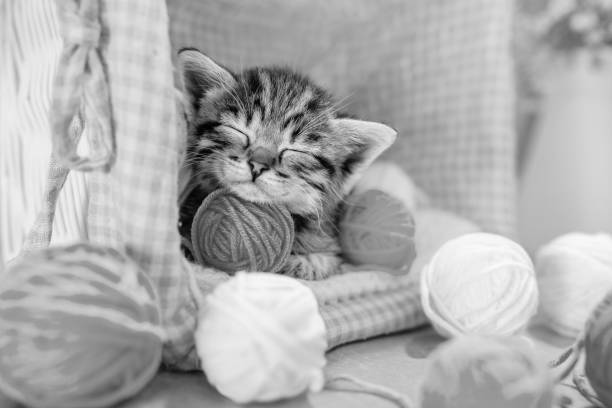


Zoomed (Replication):


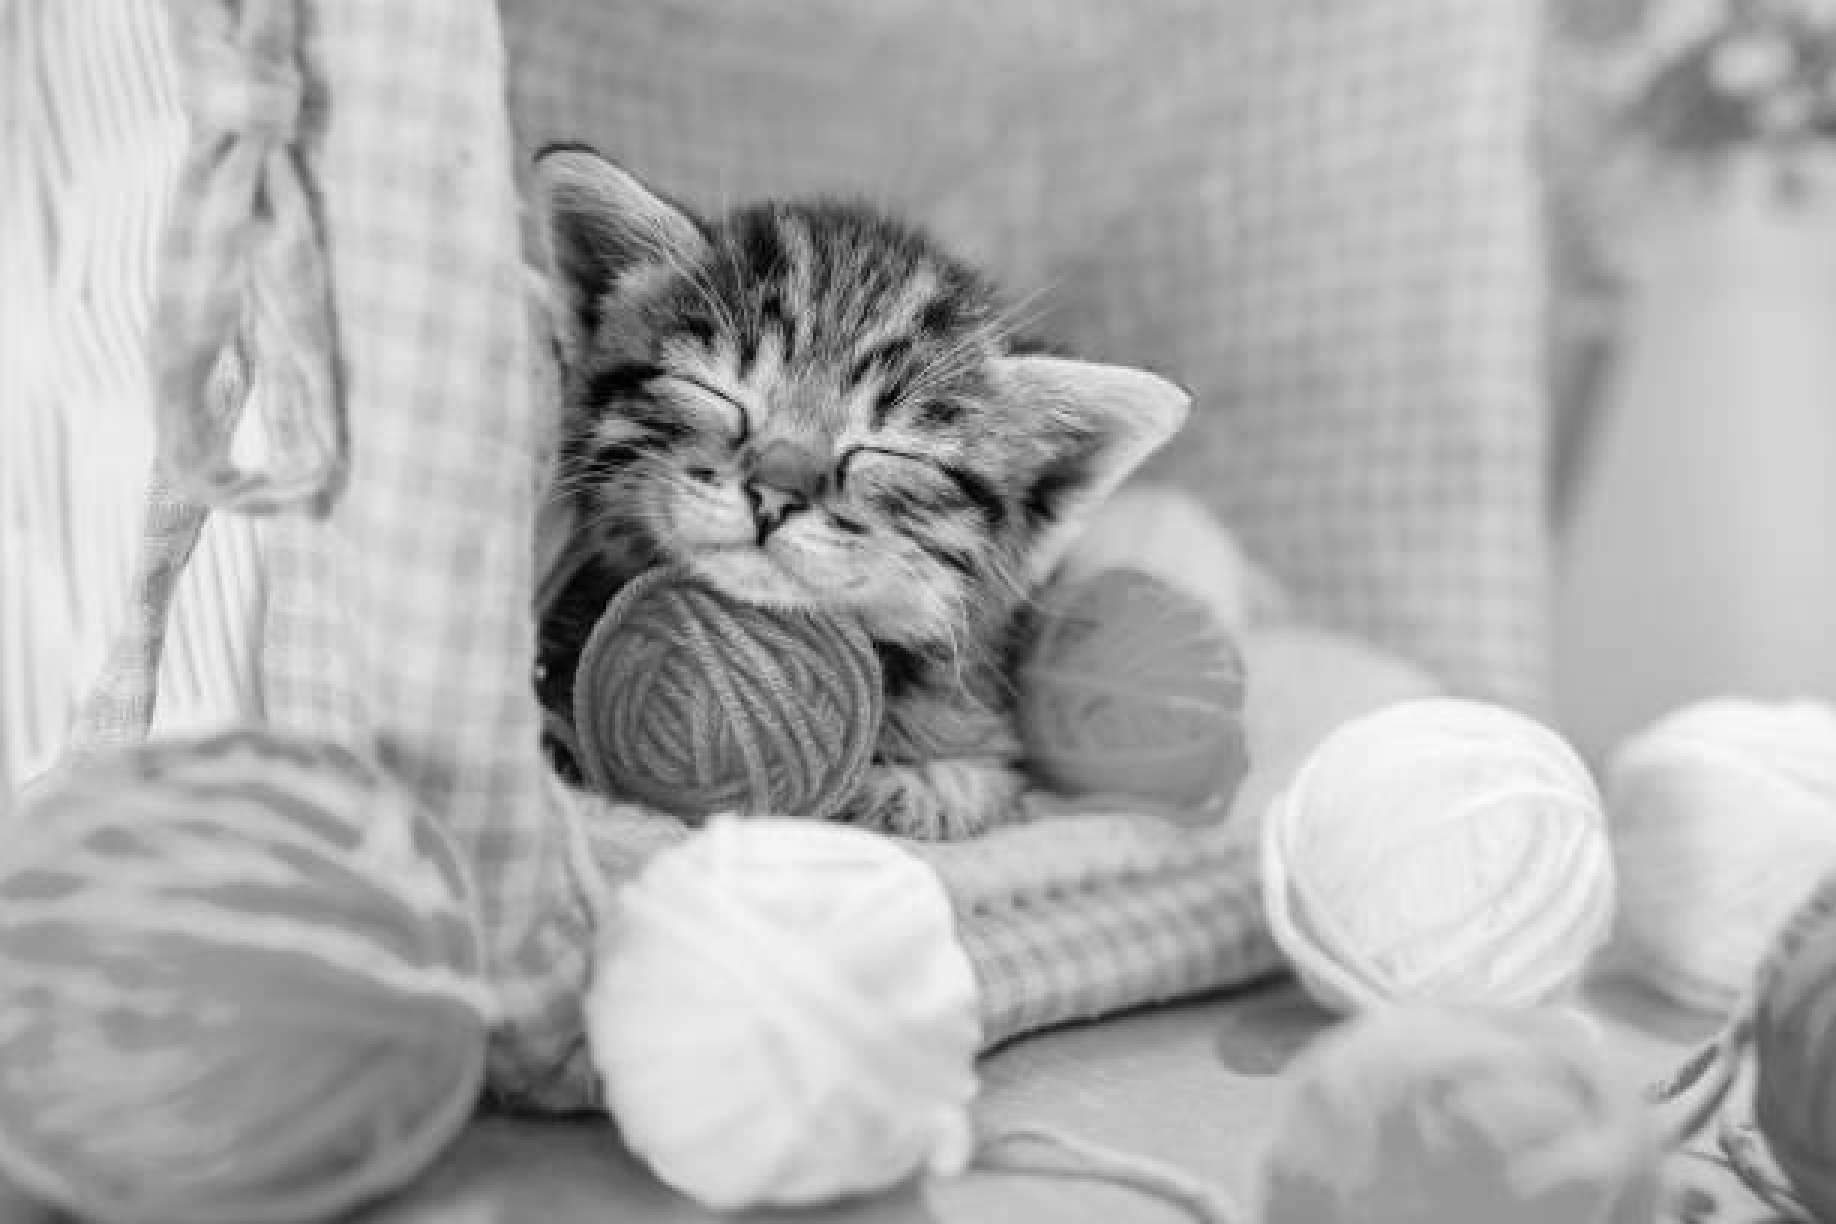


Shrunk (Replication):


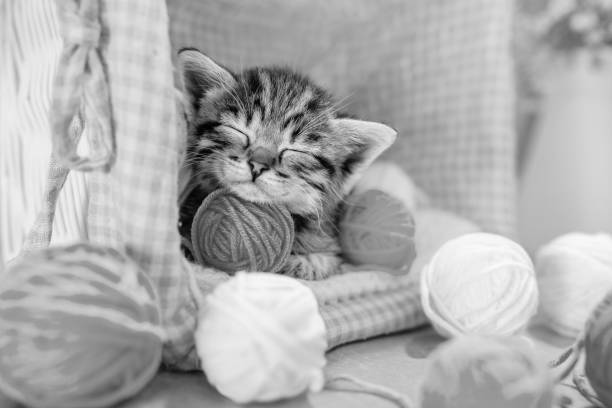


Zoomed (Bilinear):


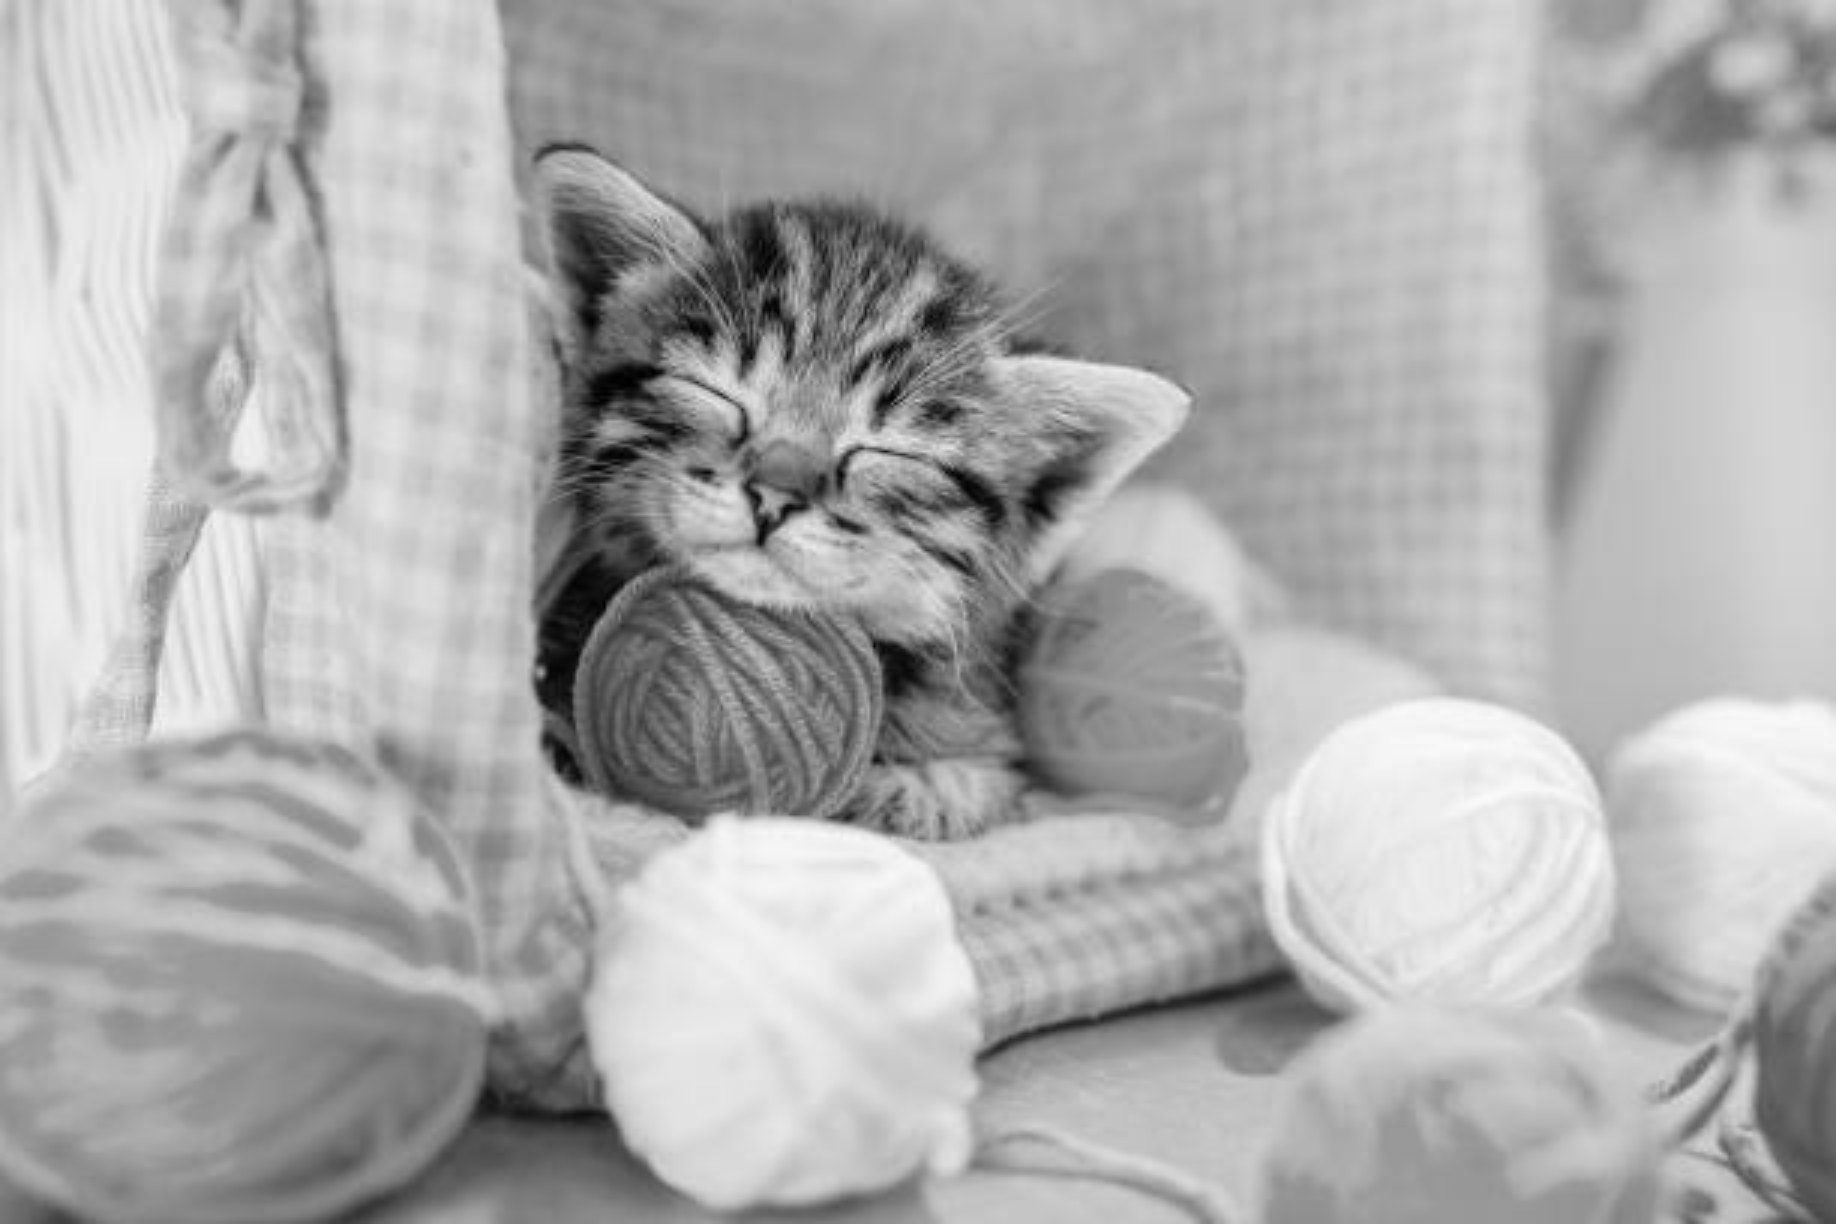


Shrunk (Bilinear):


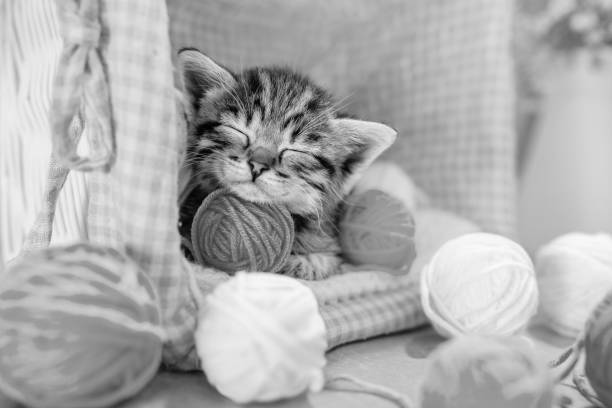

In [ ]:
quiz1_obj = quiz1(img)
quiz1_obj.zoom_replication()
quiz1_obj.shrink_replication()
quiz1_obj.zoom_bilinear()
quiz1_obj.shrink_bilinear()
quiz1_obj.display()

## Quiz 2
Write a program to enhance the 8-bit gray scale images using the given function:


In [ ]:
class quiz2:
  def __init__(self, img):
    self.img = img
    self.gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # default of cv is BGR color

  def enhance_func(self, r,l):
    # Ensure r is within the valid range [0, l-1]
    if r < 0:
        r = 0
    elif r >= l:
        r = l - 1

    if r == 0:
        return 0 # Handle the case where r is
    elif 0 < r <= (l/4) :
        return int(5*l/6)
    elif (l/4) < r <= (3*l/4) :
        return int(2*r/3)
    elif (3*l/4) < r < l : # Use < l
        return int(5*l/6)
    else:
        return r # Return original value for any unhandled

  def enhance_img(self):
    # Get image dimensions
    rows, cols = self.gray_img.shape

    # Create an empty image to store the enhanced version
    self.enhanced_img = np.zeros((rows, cols), dtype=np.uint8)

    # Apply the enhancement function to each pixel
    # Assuming the image is 8-bit, the maximum intensity
    L = 256
    self.gray_img = self.gray_img.astype(np.uint8)
    for i in range(rows):
        for j in range(cols):
            r = self.gray_img[i, j]
            self.enhanced_img[i, j] = self.enhance_func(r,L)

  def display(self):
    print("Original Grayscale Image:")
    cv2_imshow(self.gray_img)

    print("\nEnhanced Image:")
    cv2_imshow(self.enhanced_img)

In [ ]:
# Load the image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

img = cv2.imread(fn)

Saving kittens_6897fa707afb7.jpg to kittens_6897fa707afb7 (1).jpg
User uploaded file "kittens_6897fa707afb7 (1).jpg" with length 36964 bytes


/tmp/ipython-input-2545160631.py:18: RuntimeWarning: overflow encountered in scalar multiply
  return int(2*r/3)


Original Grayscale Image:


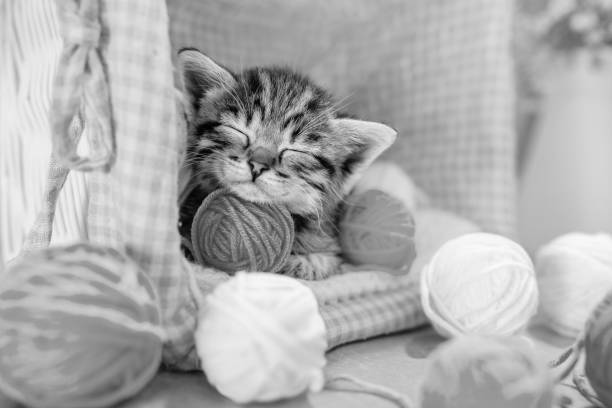


Enhanced Image:


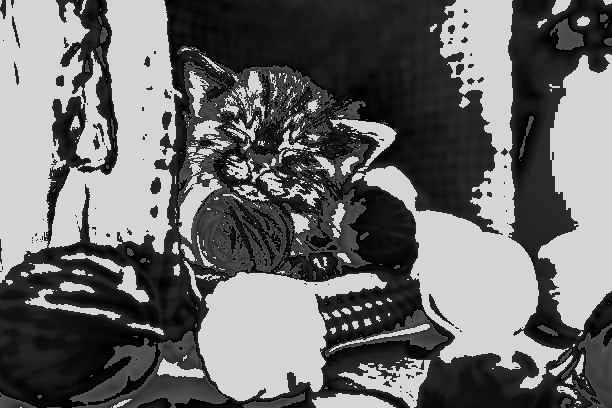

In [ ]:
q2 = quiz2(img)
q2.enhance_img()
q2.display()

## Quiz 3
Write a program to enhance the 8-bit gray scale images using the power-law transformation
with different combinations of 𝑐 and 𝛾 when 𝑐 = 0.4, 1, 1.6 and 𝛾 = 0.3, 2.4.

In [ ]:
class quiz3:
  def __init__(self, img):
    self.img = img
    self.gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # default of cv is BGR color

  def power_law_transform(self, r, c, gamma):
    transformed_value = c * (r / 255.0)**gamma * 255.0
    return int(np.clip(transformed_value, 0, 255))

  def apply_power_law_transformation(self, c, gamma):
    enhanced_img_pl = np.zeros(self.gray_img.shape, dtype=np.uint8)
    rows, cols = self.gray_img.shape
    for i in range(rows):
      for j in range(cols):
        r = self.gray_img[i,j]
        enhanced_img_pl[i,j] = self.power_law_transform(r, c, gamma)
    return enhanced_img_pl

  def display(self, enhanced_img_pl):
    print("Original Grayscale Image:")
    cv2_imshow(self.gray_img)

    print("\nEnhanced Image:")
    cv2_imshow(enhanced_img_pl)

In [ ]:
# Load the image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

img = cv2.imread(fn)

Saving kittens_6897fa707afb7.jpg to kittens_6897fa707afb7 (2).jpg
User uploaded file "kittens_6897fa707afb7 (2).jpg" with length 36964 bytes


Original Grayscale Image:


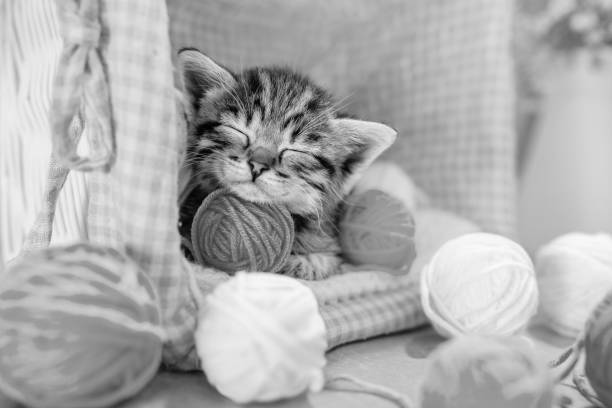


Enhanced Image:


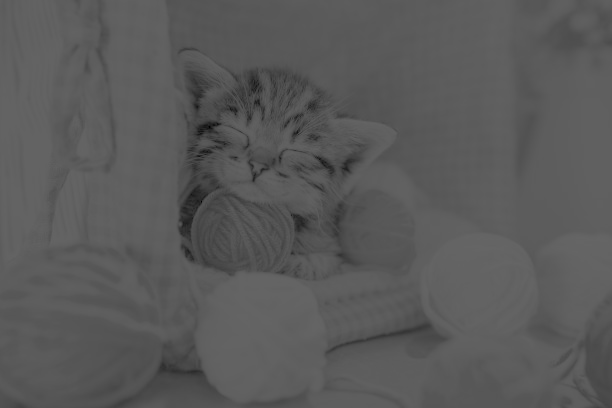

Original Grayscale Image:


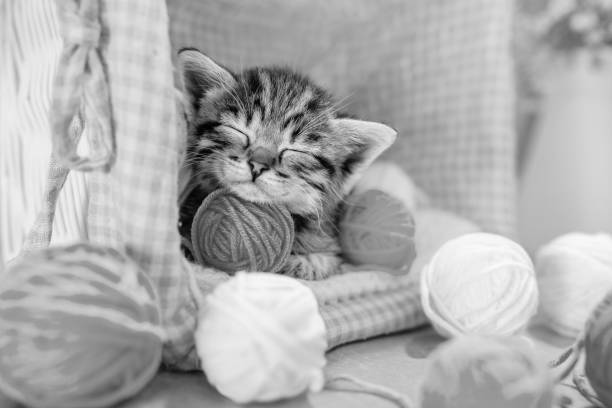


Enhanced Image:


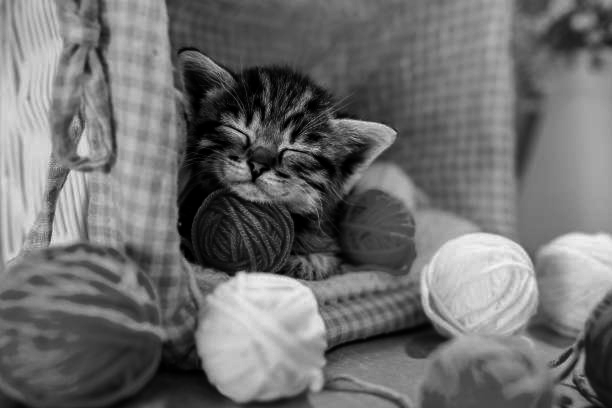

Original Grayscale Image:


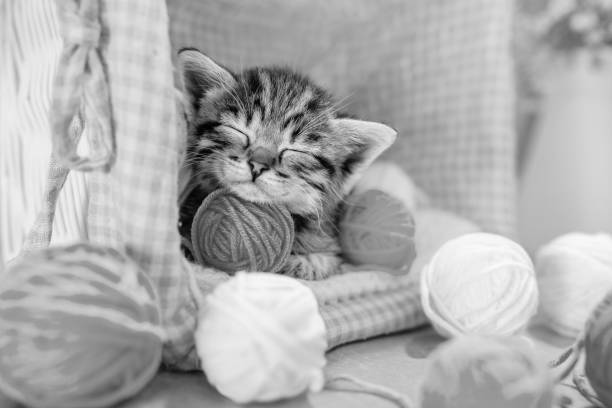


Enhanced Image:


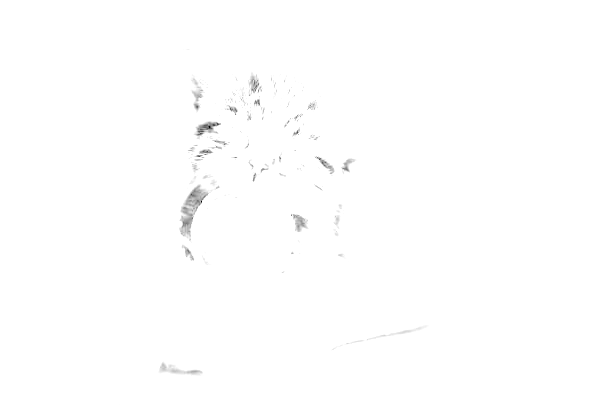

Original Grayscale Image:


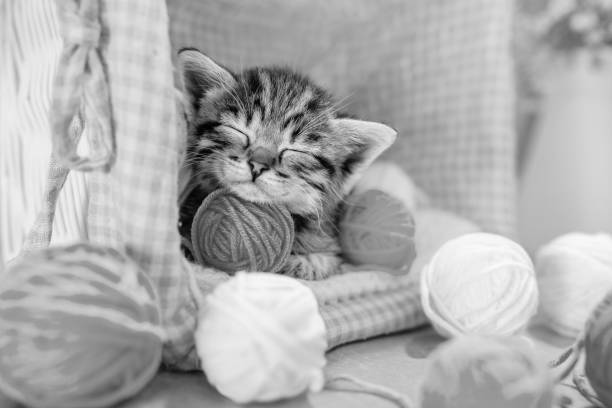


Enhanced Image:


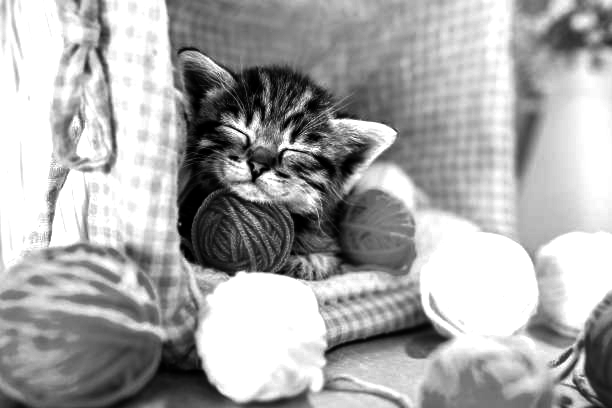

In [ ]:
q3 = quiz3(img)
enhanced_img_pl = q3.apply_power_law_transformation(c=0.4, gamma=0.3)
q3.display(enhanced_img_pl)
enhanced_img_pl = q3.apply_power_law_transformation(c=1, gamma=2.4)
q3.display(enhanced_img_pl)
enhanced_img_pl = q3.apply_power_law_transformation(c=1.6, gamma=0.3)
q3.display(enhanced_img_pl)
enhanced_img_pl = q3.apply_power_law_transformation(c=1.6, gamma=2.4)
q3.display(enhanced_img_pl)